<a id="top"></a>

The aim of this notebook is to clean and prepare the data in the leavetimes dataset.  
The data will be used to build a predictive model that will predict the travel time for a bus route.

***

# Import Packages

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

***

# Bold Print Function

In [3]:
def print_bold(string):
    """
    Function to print a given string in bold text.
    """
    print("\033[1m" + string + "\033[0m")

***

# Load Original Data File

In [ ]:
# load in original data file using pandas
# this may take a couple of minutes and can result in a memory error if many notebooks are in use
t1 = datetime.datetime.now()
df_leavetimes = pd.read_csv('/home/faye/data/rt_leavetimes_DB_2018.txt', sep=';',error_bad_lines=False)
diff = datetime.datetime.now() - t1
print(f"Time to read: {diff}")

In [3]:
# load in original data file using a feather file
t1 = datetime.datetime.now()
df_leavetimes = pd.read_feather('/home/faye/data/leavetimes.feather')
diff = datetime.datetime.now() - t1
print(f"Time to read: {diff}")

Time to read: 0:02:39.744080


***

<a id="contents"></a>
# Contents

- [1. Data Quality Report](#data_quality_report)
    - [1.1. Overview of the Dataset](#overview)
    - [1.2. Feature Data Types](#feature_data_types)
    - [1.3. Duplicates and Constants](#duplicates_and_constants)
    - [1.4. Descriptive Statistics for Continuous Features](#desc_stats_continuous)
    - [1.5. Descriptive Statistics for Categorical Features](#desc_stats_categorical)
    - [1.6. Plotting Continuous Features](#plotting_continuous)
    - [1.7. Plotting Categorical Features](#plotting_categorical)
    - [1.8. Logical Integrity Check](#logical_integrity_check)
- [2. Data Quality Plan](#data_quality_plan)
    - [2.1. The Plan](#the_plan)
    - [2.2. Applying the Solutions](#applying_solutions)

***

<a id="data_quality_report"></a>
# 1. Data Quality Report
[Back to contents](#contents)

<a id="overview"></a>
## 1.1. Overview of the Dataset
[Top of section](#data_quality_report)

> Each entry in the leavetimes dataset contains the actual data for one leave time of one vehicle at one stop point of a route.

In [4]:
# print the number of rows and features
num_rows = df_leavetimes.shape[0]
features = df_leavetimes.shape[1]
print(f"The dataset has {num_rows} rows with {features} features.")

The dataset has 116949113 rows with 18 features.


In [5]:
# print the first 5 rows of the dataset
print("The first 5 Rows are:")
df_leavetimes.head(5)

The first 5 Rows are:


,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


In [6]:
# print the last 5 rows of the dataset
print("The last 5 Rows are:")
df_leavetimes.tail(5)

The last 5 Rows are:


,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
116949108,DB,31-DEC-18 00:00:00,8588153,78,4383,28605,28605,28998,29013,3265721,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116949109,DB,31-DEC-18 00:00:00,8587459,78,4383,22695,22695,23247,23247,3265687,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116949110,DB,31-DEC-18 00:00:00,8586183,78,4383,51481,51481,52237,52283,2693229,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116949111,DB,31-DEC-18 00:00:00,8589374,23,7053,53659,53659,53525,53525,3265669,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116949112,DB,31-DEC-18 00:00:00,8589372,24,2088,46383,46383,46315,46325,3265669,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN


***

<a id="feature_data_types"></a>
## 1.2. Feature Data Types
[Top of section](#data_quality_report)

In [4]:
# print the data type for each feature
df_leavetimes.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
PROGRNUMBER          int64
STOPPOINTID          int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR       int64
ACTUALTIME_DEP       int64
VEHICLEID            int64
PASSENGERS         float64
PASSENGERSIN       float64
PASSENGERSOUT      float64
DISTANCE           float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE               float64
dtype: object

- I am not concerned with the feature DATASOURCE so I will leave it as an object.  
- DAYOFSERVICE and LASTUPDATE are dates so I will convert these to datetime objects.  
- TRIPID, STOPPOINTID, and VEHICLEID are all unique ID numbers. I will convert these to type category.  
- PROGRNUMBER is the sequential position of the stop point in the trip. I will convert this to category.  
- PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, and ACTUALTIME_DEP are in unit seconds, I will leave these as int64 for the moment.  
- PASSENGERS, PASSENGERSIN, and PASSENGERSOUT describe the number of passengers on board, boarding, and descending. I will leave these features as float64.  
- DISTANCE describes the distance measured from the beginning of the trip, I will leave this as float64.  
- SUPPRESSED is a flag feature. If the leave time is planned and achieved, the record will contain both the planned and actual data. If the leave time is planned and suppressed, the record will contain only the planned data and the SUPRESSED flag will be checked. When the trip is partially suppressed it says the previous link is suppressed (0=achieved,1=suppressed).  
- The JUSTIFICATIONID feature is simply described as 'fault code' and listed as a number. I will examine this feature.
- The NOTE feature is described as 'free note', I will also need to examine this feature.

### 1.2.1. Convert DAYOFSERVICE and LASTUPDATE to datetime objects

In [4]:
# convert DAYOFSERVICE and LASTUPDATE to datetime object
df_leavetimes['DAYOFSERVICE'] = df_leavetimes['DAYOFSERVICE'].astype('datetime64')
df_leavetimes['LASTUPDATE'] = df_leavetimes['LASTUPDATE'].astype('datetime64')

### 1.2.2. Convert TRIPID, STOPPOINTID, VEHICLEID, and PROGRNUMBER to category

In [5]:
# convert the selected columns to type category
cols = ['TRIPID', 'STOPPOINTID', 'VEHICLEID', 'PROGRNUMBER']

for col in cols:
    df_leavetimes[col] = df_leavetimes[col].astype('category')

### 1.2.3. Convert SUPPRESSED to boolean

In [6]:
# convert SUPPRESSED to boolean
df_leavetimes['SUPPRESSED'] = df_leavetimes['SUPPRESSED'].astype('boolean')

### 1.2.4. Examine JUSTIFICATIONID and NOTE

#### JUSTIFICATIONID

In [5]:
# print the unique values of the JUSTIFICATIONID feature
df_leavetimes['JUSTIFICATIONID'].unique()

array([           nan, 4.84981386e+17, 4.84981386e+17, ...,
       4.84981387e+17, 4.84981387e+17, 4.84981387e+17])

In [7]:
# print the number of unique values for the JUSTIFICATIONID feature
len(df_leavetimes['JUSTIFICATIONID'].unique())

34966

> In the Concept Design document for the database, from which this data has come, we see that JUSTIFICATIONID is used as a foreign key to link to a justifications table whose data we do not have.  
As we are missing the key data to which this feature relates I believe it will be unusable for modelling an there for I will drop this feature later. 
For the moment I will convert this feature to type category as it is a unique identification number.

In [7]:
# convert JUSTIFICATIONID to type category
df_leavetimes['JUSTIFICATIONID'] = df_leavetimes['JUSTIFICATIONID'].astype('category')

#### NOTE

In [8]:
# print the unique values for the NOTE feature
df_leavetimes['NOTE'].unique()

array([nan])

> The NOTE feature is a constant column of missing values. This will be dealt with later so I will leave the data type as float64.

### 1.2.5. Converted Feature Data Types

In [8]:
# display the datatype of each feature
df_leavetimes.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                category
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                boolean
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                      float64
dtype: object

In [9]:
# select all categorical columns
categorical_columns = df_leavetimes[
    ['DATASOURCE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 
     'VEHICLEID', 'SUPPRESSED', 'JUSTIFICATIONID'
    ]
].columns

In [10]:
# select all continuous columns
continuous_columns = df_leavetimes[
    ['DAYOFSERVICE', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 'ACTUALTIME_DEP', 
     'PASSENGERS', 'PASSENGERSIN', 'PASSENGERSOUT', 'DISTANCE', 'LASTUPDATE', 'NOTE']
].columns

***

<a id="duplicates_and_constants"></a>
## 1.3. Duplicates and Constants
[Top of section](#data_quality_report)

### 1.3.1. Duplicate Rows

In [14]:
# Find number of duplicate rows
num_duplicate_rows = df_leavetimes.duplicated().sum()
print(f"There are {num_duplicate_rows} duplicated rows in this dataset (excluding the first row).")
num_duplicate_rows_inclusive = df_leavetimes[df_leavetimes.duplicated(keep=False)].shape[0]
print(f"There are {num_duplicate_rows_inclusive} duplicated rows in this dataset (including row that is duplicated).")

MemoryError: Unable to allocate 892. MiB for an array with shape (116949113,) and data type int64

> There are no duplicate rows in this dataset.

### 1.3.2. Duplicate Columns

> There does not appear to be any duplicate columns in this dataset

### 1.3.3. Constant Columns

In [15]:
# Print Categorical Descriptive Statistics
df_leavetimes[categorical_columns].describe().T

,count,unique,top,freq
DATASOURCE,116949113,1,DB,116949113
TRIPID,116949113,658961,7325784,1924
PROGRNUMBER,116949113,109,14,2108194
STOPPOINTID,116949113,4774,1479,214973
VEHICLEID,116949113,1151,2868400,179716
SUPPRESSED,588660,2,False,438942
JUSTIFICATIONID,588587,34965,4.84981e+17,2895


> From this we see that DATASOURCE is a constant column as it only has 1 unique value, this will be dropped.

In [11]:
# Check that the continuous features have a standard deviation greater than zero
df_leavetimes[continuous_columns].std()

PLANNEDTIME_ARR    17496.620711
PLANNEDTIME_DEP    17496.620711
ACTUALTIME_ARR     17507.103983
ACTUALTIME_DEP     17506.395727
PASSENGERS                  NaN
PASSENGERSIN                NaN
PASSENGERSOUT               NaN
DISTANCE                    NaN
NOTE                        NaN
dtype: float64

> From the standard deviation of the continuous features above we can see that PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE, and NOTE are constant columns of null values, these will be dropped.

### 1.3.4. Drop Constant Columns

In [12]:
# drop constant columns
constant_columns = [
    'DATASOURCE', 'PASSENGERS', 'PASSENGERSIN', 'PASSENGERSOUT',
    'DISTANCE', 'NOTE'
]

df_leavetimes = df_leavetimes.drop(columns=constant_columns)

## Save Cleaned Data Frame - 1

In [13]:
# reorder columns
reordered_columns = [
    'DAYOFSERVICE', 'LASTUPDATE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 
    'VEHICLEID', 'JUSTIFICATIONID', 'SUPPRESSED',
    'PLANNEDTIME_ARR', 'ACTUALTIME_ARR', 
    'PLANNEDTIME_DEP', 'ACTUALTIME_DEP',    
]

df_leavetimes = df_leavetimes[reordered_columns]

In [14]:
# save dataframe to csv
df_leavetimes.to_csv('/home/faye/data/leavetimes_cleaned_1.csv')

In [15]:
# save dataframe to feather
df_leavetimes.to_feather('/home/faye/data/leavetimes_cleaned_1.feather')

# Load Cleaned Data (if needed)

In [4]:
# load in cleaned data from feather file
df_leavetimes = pd.read_feather('/home/faye/data/leavetimes_cleaned_1.feather')

<a id="desc_stats_continuous"></a>
## 1.4. Descriptive Statistics for Continuous Features
[Top of section](#data_quality_report)

In [5]:
# Select columns containing continuous data
continuous_columns = df_leavetimes[
    ['DAYOFSERVICE', 'LASTUPDATE',
     'PLANNEDTIME_ARR', 'ACTUALTIME_ARR', 
     'PLANNEDTIME_DEP', 'ACTUALTIME_DEP']
].columns

### 1.4.1. Descriptive Statistics

In [20]:
# print table with descriptive statistics for all the continuous features
continuous_feat_desc = df_leavetimes[continuous_columns].describe(datetime_is_numeric=True).T

print_bold("Descriptive Statistics for Continuous Features")
continuous_feat_desc

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,116949113,2018-06-28 22:09:40.329759488,2018-01-01 00:00:00,2018-04-01 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
LASTUPDATE,116949113,2018-07-16 14:47:12.610400512,2018-01-08 17:21:10,2018-04-10 15:08:12,2018-07-13 19:47:00,2018-10-23 06:57:21,2019-01-16 18:27:21,NaN
PLANNEDTIME_ARR,1.16949e+08,53263.5,16200,37975,53289,67243,91680,17496.6
ACTUALTIME_ARR,1.16949e+08,53446.4,15974,38105,53511,67502,97177,17507.1
PLANNEDTIME_DEP,1.16949e+08,53263.5,16200,37975,53289,67243,91680,17496.6
ACTUALTIME_DEP,1.16949e+08,53459,15974,38117,53526,67514,97177,17506.4


> From the min and max for DAYOFSERVICE we can see that the data ranges from the 1st January to 31st December for the year 2018. By looking at the percentiles it also appears that the data is evenly spread throughout the year.

In [56]:
# convert the min ACTUALTIME_ARR and max ACTUALTIME_DEP to HH:MM:SS
print_bold("min ACTUALTIME_ARR and max ACTUALTIME_DEP")
print(datetime.timedelta(seconds=15974))
print(datetime.timedelta(seconds=97177))
# convert the median ACTUALTIME_ARR and ACTUALTIME_DEP to HH:MM:SS
print_bold("median for ACTUALTIME_ARR and ACTUALTIME_DEP")
print(datetime.timedelta(seconds=53511))
print(datetime.timedelta(seconds=53526))

min ACTUALTIME_ARR and max ACTUALTIME_DEP
4:26:14
1 day, 2:59:37
median for ACTUALTIME_ARR and ACTUALTIME_DEP
14:51:51
14:52:06


> If we look at the min for ACTUALTIME_ARR and max for ACTUALTIME_DEP and convert the seconds to time we can see that the leave times range from 04:26 to 02:59 the following day. If we look at the median value for ACTUALTIME_ARR and ACTUALTIME_DEP it appears that the data is evenly spread throughout this range.

### 1.4.2. Range of Values

In [46]:
# for each continuous feature display the range of values and the number of instances for the 15 most common values
for feat in continuous_columns:
    
    print_bold(feat)
    print("Range {} is: {}" .format( feat, (df_leavetimes[feat].max() - df_leavetimes[feat].min()) ) )
    print("-"*10)
    
    print_bold("{0:10.5} {1}" .format("Value", "Number of Instances") )
    print(df_leavetimes[feat].value_counts().nlargest(15), "\n\n\n")
    print("-"*50)

DAYOFSERVICE
Range DAYOFSERVICE is: 364 days 00:00:00
----------
Value      Number of Instances
2018-02-12    384590
2018-02-19    383788
2018-04-17    383413
2018-05-08    382864
2018-04-09    382671
2018-03-20    382307
2018-05-01    382110
2018-04-23    381974
2018-02-27    381623
2018-02-06    381418
2018-01-29    381413
2018-04-16    381326
2018-01-08    381300
2018-02-02    381159
2018-01-04    381147
Name: DAYOFSERVICE, dtype: int64 



--------------------------------------------------
LASTUPDATE
Range LASTUPDATE is: 373 days 01:06:11
----------
Value      Number of Instances
2018-02-28 13:18:29    384590
2018-02-28 14:04:41    383788
2018-06-25 08:16:13    383413
2018-06-26 07:43:13    382864
2018-04-18 11:29:36    382671
2018-03-28 15:03:15    382307
2018-06-25 18:30:03    382110
2018-06-13 08:27:05    381974
2018-03-08 10:16:09    381623
2018-02-28 11:48:21    381418
2018-02-28 10:24:30    381413
2018-05-16 17:29:16    381326
2018-01-16 08:33:19    381300
2018-02-28 11:08:41

In [22]:
# check for null values for each continuous feature
print_bold("The sum of null values for Continuous Features")
print("-"*50)
print(df_leavetimes[continuous_columns].isnull().sum())

The sum of null values for Continuous Features
--------------------------------------------------
DAYOFSERVICE       0
LASTUPDATE         0
PLANNEDTIME_ARR    0
ACTUALTIME_ARR     0
PLANNEDTIME_DEP    0
ACTUALTIME_DEP     0
dtype: int64


> From the above we can that we have no null values for the continuous features.

In [43]:
# print the cardinality of each continuous feature
features_cardinality = list(df_leavetimes[continuous_columns].columns.values)

print_bold("{0:35} {1}" .format("Feature","Cardinality") )
print("{0:35} {1}" .format("-------","-----------") )

for c in features_cardinality:
    print("{0:35} {1}" .format( c, (len(df_leavetimes[c].unique()))) )

Feature                             Cardinality
-------                             -----------
DAYOFSERVICE                        360
LASTUPDATE                          360
PLANNEDTIME_ARR                     72712
ACTUALTIME_ARR                      74361
PLANNEDTIME_DEP                     72712
ACTUALTIME_DEP                      74363


> We can see from the cardinality for DAYOFSERVICE that we have almost a full years worth of data for the leavetimes.

<a id="desc_stats_categorical"></a>
## 1.5. Descriptive Statistics for Categorical Features
[Top of section](#data_quality_report)

In [6]:
# Select columns containing continuous data
categorical_columns = df_leavetimes[
    ['TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 'VEHICLEID', 
     'JUSTIFICATIONID', 'SUPPRESSED']
].columns

In [6]:
# print the descriptive statistics for all the categorical features
categorical_feat_desc = df_leavetimes[categorical_columns].describe().T
categorical_feat_desc

,count,unique,top,freq
TRIPID,116949113,658961,7325784,1924
PROGRNUMBER,116949113,109,14,2108194
STOPPOINTID,116949113,4774,1479,214973
VEHICLEID,116949113,1151,2868400,179716
JUSTIFICATIONID,588587,34965,4.84981e+17,2895
SUPPRESSED,588660,2,False,438942


In [7]:
# check for null values for each categorical feature
print_bold("The sum of null values for Continuous Features")
print("-"*50)
print(df_leavetimes[categorical_columns].isnull().sum())

The sum of null values for Continuous Features
--------------------------------------------------
TRIPID                     0
PROGRNUMBER                0
STOPPOINTID                0
VEHICLEID                  0
JUSTIFICATIONID    116360526
SUPPRESSED         116360453
dtype: int64


> From the above we can see that there is a very high number of entries with null values for the features JUSTIFICATIONID and SUPPRESSED.

In [10]:
# print the % of null values for JUSTIFICATIONID and SUPPRESSED
print_bold("The percentage of null values for JUSTIFICATIONID and SUPPRESSED")
print("-"*50)
print("{:20}{:.2f}" .format("JUSTIFICATIONID", df_leavetimes['JUSTIFICATIONID'].isnull().sum() / df_leavetimes.shape[0] * 100) )
print("{:20}{:.2f}" .format("SUPPRESSED", df_leavetimes['SUPPRESSED'].isnull().sum() / df_leavetimes.shape[0] * 100) )

The percentage of null values for JUSTIFICATIONID and SUPPRESSED
--------------------------------------------------
JUSTIFICATIONID     99.50
SUPPRESSED          99.50


> We have a extremely high number of missing values for both the JUSTIFICATIONID and SUPPRESSED feature.  
I don't believe JUSTIFICATIONID will prove useful for modelling due to the high number of missing values and the fact it references to data which we do not have.  
If we cannot infer the missing values for SUPPRESSED then I do not believe this feature will prove useful for any predictive modelling.

In [33]:
# frequency table for categorical features
for feat in categorical_columns:
    title = "Frequency Table for " + feat + ":"
    print_bold(title)
    print("-"*50)
    print(df_leavetimes[feat].value_counts(normalize=True) * 100)
    print()

Frequency Table for TRIPID:
--------------------------------------------------
7325784    1.645160e-03
7318451    1.637464e-03
7317538    1.627203e-03
7319288    1.601551e-03
7318628    1.566493e-03
               ...     
7659745    8.550728e-07
7772657    8.550728e-07
6378249    8.550728e-07
6384114    8.550728e-07
6281542    8.550728e-07
Name: TRIPID, Length: 658961, dtype: float64

Frequency Table for PROGRNUMBER:
--------------------------------------------------
14     1.802659
13     1.801557
16     1.800523
11     1.798689
12     1.797253
         ...   
106    0.000012
107    0.000012
108    0.000012
105    0.000012
109    0.000012
Name: PROGRNUMBER, Length: 109, dtype: float64

Frequency Table for STOPPOINTID:
--------------------------------------------------
1479    1.838176e-01
7453    1.738055e-01
400     1.720176e-01
1353    1.709667e-01
1478    1.709325e-01
            ...     
7497    1.710146e-06
7407    8.550728e-07
7504    8.550728e-07
7604    8.550728e-07
7627    8

> Nearly three quarters of the values that we have for SUPPRESSED are False meaning the trips were achieved. 25% of these trips were suppressed. 

<a id="plotting_continuous"></a>
## 1.6. Plotting Continuous Features
[Top of section](#data_quality_report)

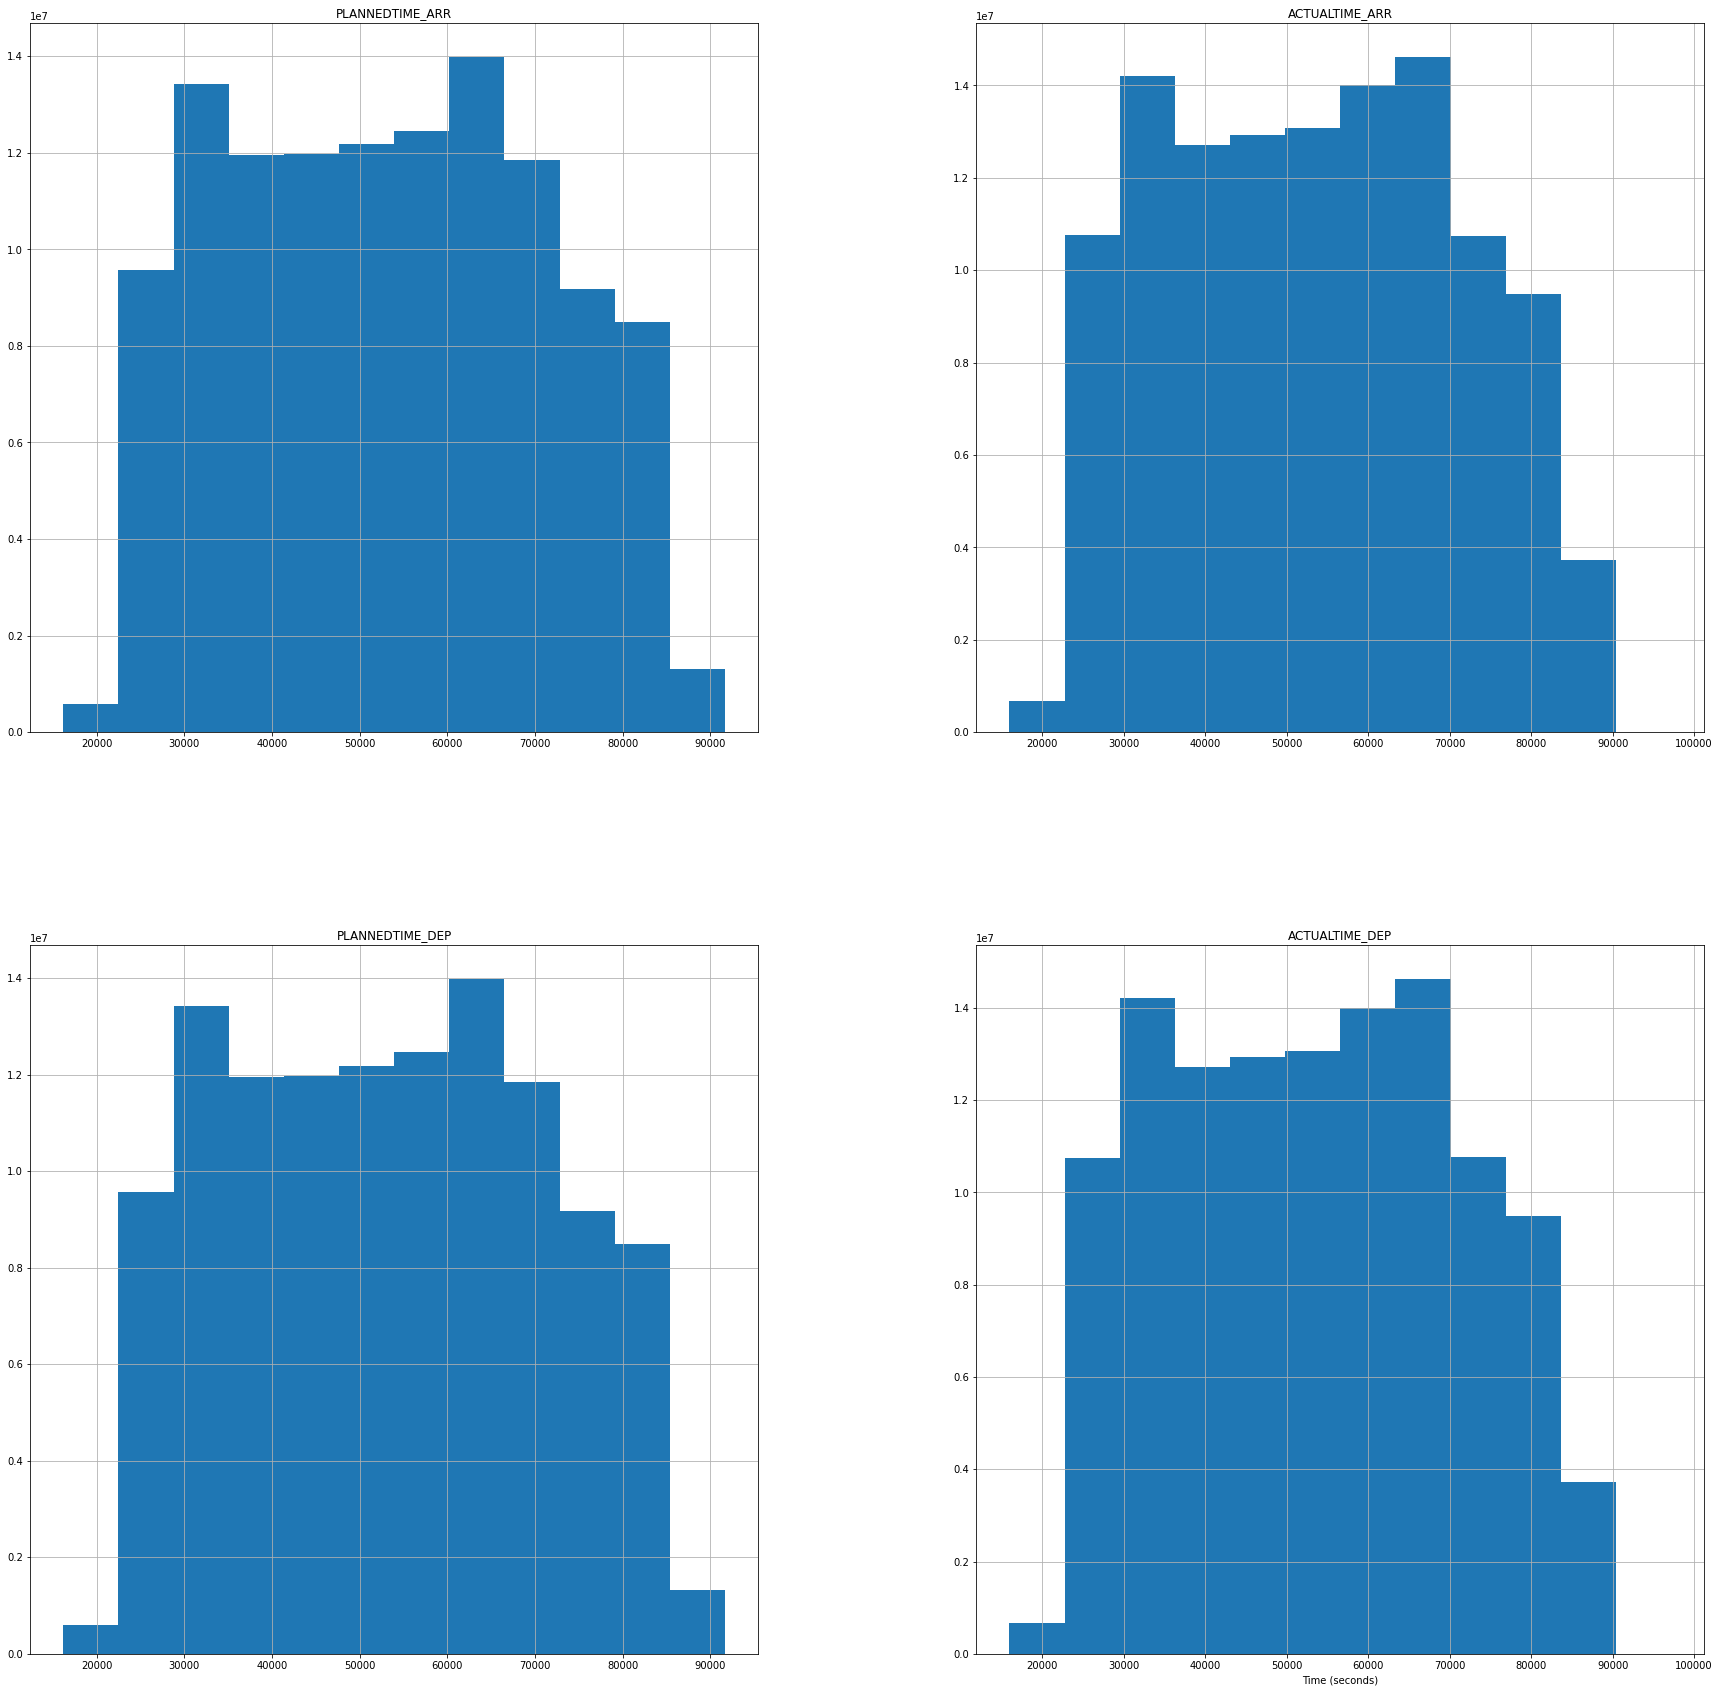

In [25]:
# Plot histograms for continuous features
df_leavetimes[continuous_columns].hist(layout=(2, 2), figsize=(30,30), bins=12)
#plt.savefig('continuous_histograms_1-1.pdf')
plt.xlabel("Time (seconds)")
plt.show()

> From the plots above we can see that we have an increase in the number of entries where the arrival and departure times are around 30,000 and 60,000-70,000 seconds.

In [21]:
# convert seconds to HH:MM:SS
print_bold("{:10}{}" .format("Seconds", "HH:MM:SS"))
print("{:<10}{}" .format(30000, datetime.timedelta(seconds=30000)))
print("{:<10}{}" .format(60000, datetime.timedelta(seconds=60000)))
print("{:<10}{}" .format(70000, datetime.timedelta(seconds=70000)))

Seconds   HH:MM:SS
30000     8:20:00
60000     16:40:00
70000     19:26:40


> These times are roughly correspond with rush hour times.

<a id="plotting_categorical"></a>
## 1.7. Plotting Categorical Features
[Top of section](#data_quality_report)

> The only continuous feature I see any purpose in plotting is SUPPRESSED. I do not believe there is anything to gain from plotting the ID numbers or sequential stop number (PROGRNUMBER)

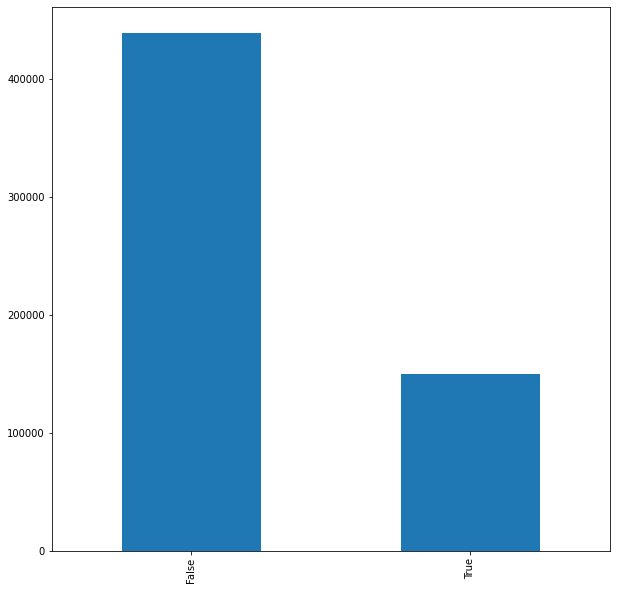

In [27]:
# plot the feature SUPPRESSED
f = df_leavetimes['SUPPRESSED'].value_counts().plot(kind='bar', figsize=(10,10))
plt.show()

<a id="logical_integrity_check"></a>
## 1.8. Logical Integrity Check
[Top of section](#data_quality_report)

<a id="data_quality_plan"></a>
# 2. Data Quality Plan
[Back to contents](#contents)

<a id="the_plan"></a>
## 2.1. The Plan
[Top of section](#data_quality_plan)

<a id="applying_solutions"></a>
## 2.2. Applying the Solutions
[Top of section](#data_quality_plan)

***

[Back to top](#top)